In [11]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
import requests
import pandas as pd

In [3]:
mysql_versions = {
    1: "MySQL 4.0",
    2: "MySQL 4.1",
    3: "MySQL 5.0",
    4: "MySQL 5.1",
    5: "MySQL 5.5",
    6: "MySQL 5.6",
    7: "MySQL 5.7",
}

In [4]:
tide_url_pattern = 'https://bugs.mysql.com/tide.php?ver=%s'

In [5]:
def get_df_for_id(version_id):
    tide_req = requests.get(tide_url_pattern % version_id)
    tide_data = pd.read_html(tide_req.text, header=0, index_col=0)[0].drop('Total')
    return tide_data

In [6]:
dfs = []
for version_id in mysql_versions:
    print('Fetching data for Version ID: %s' % version_id)
    df = get_df_for_id(version_id)
    dfs.append(df)

Fetching data for Version ID: 1
Fetching data for Version ID: 2
Fetching data for Version ID: 3
Fetching data for Version ID: 4
Fetching data for Version ID: 5
Fetching data for Version ID: 6
Fetching data for Version ID: 7


In [7]:
series = []
for (version_id, df) in enumerate(dfs, start=1):
    series.append(df['Opened'])

In [8]:
all_table = pd.concat(series, axis=1)
all_table.columns = [mysql_versions[x] for x in mysql_versions]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f30ba133a20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f30ba3a2da0>], dtype=object)

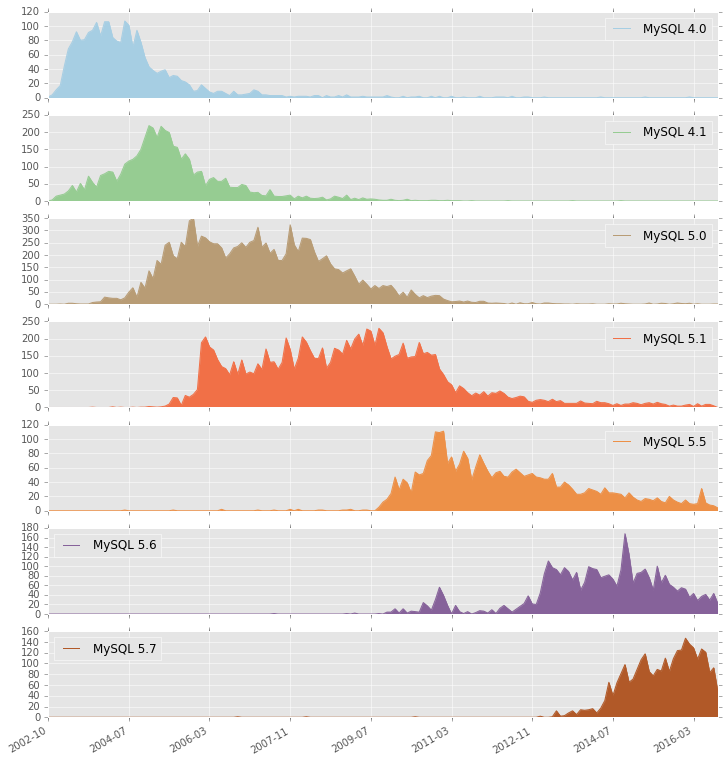

In [16]:
all_table.plot(kind='area', subplots=True, colormap='Paired', figsize=(12,14))

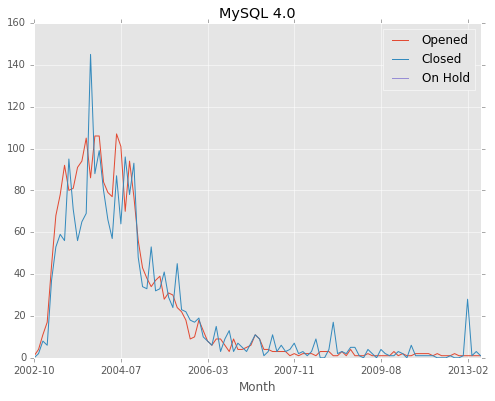

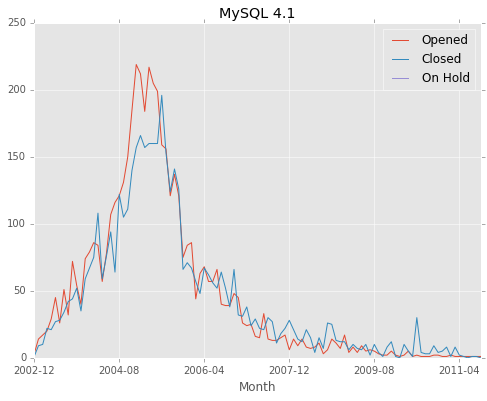

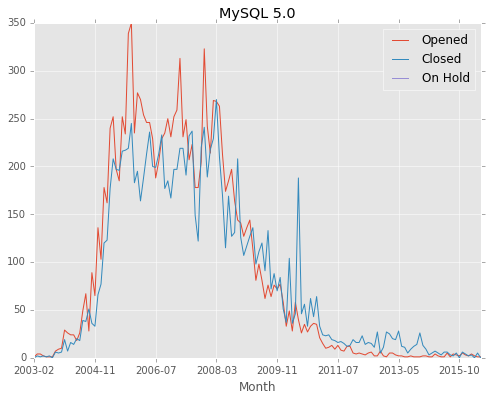

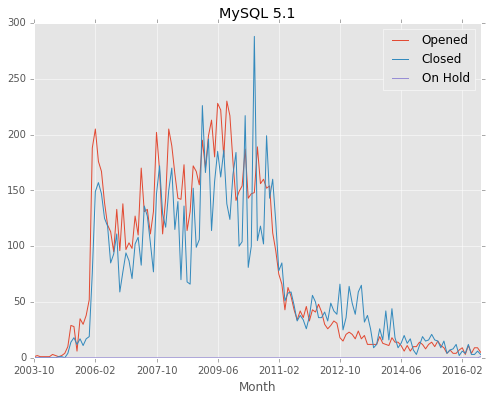

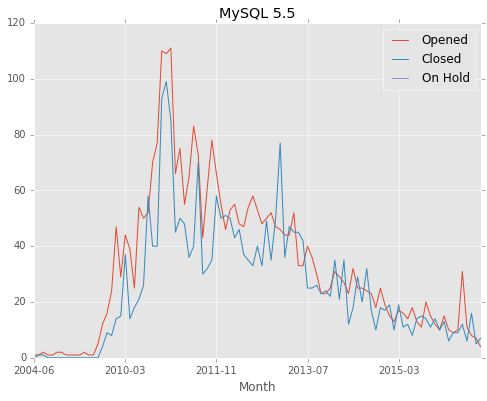

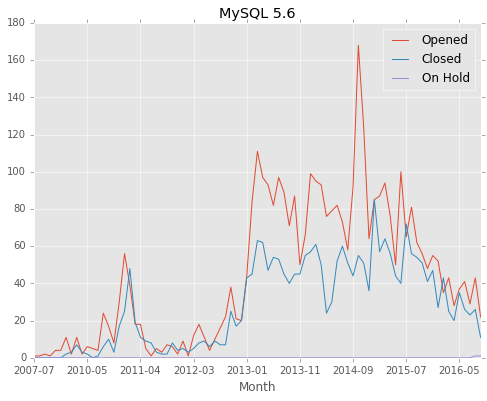

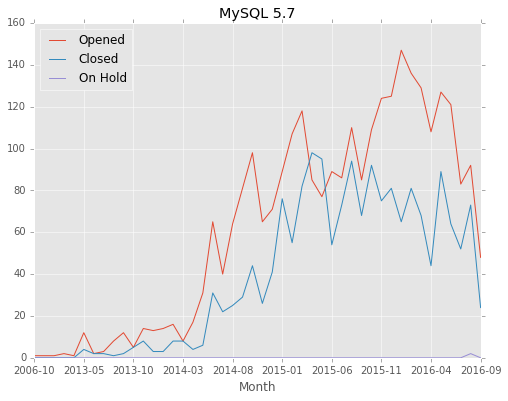

In [18]:
for (version_id, df) in enumerate(dfs, start=1):
    df.plot(title=mysql_versions[version_id], figsize=(8,6))